## Análise de receitas
Considere o dataset product_sales_report.csv, que apresenta o relatório das vendas de produtos, disponível em https://www.data.qld.gov.au/dataset/product-sales-report

Os registos foram obtidos a partir dos dados mensais das vendas em 2012-2013, agrupando as vendas pelo mês e produtos. Vamos comparar as vendas mês a mês, criando uma visualização que ajude a identificar as alterações.

Uma amostra do dataset product_sales_report.csv é apresentada em seguida:

In [641]:
import pandas as pd
df = pd.read_csv('../data/ibis-product-group-sales-report.csv')
df.head()

,Year/Month,Cigarettes - Packets,Grocery Soft Drinks Sugar Free,Fuel,Confectionery,Vegetables - Fresh,Fruit - Fresh,Snack Foods,Frozen Poultry,"Rice, Pasta & Noodles",...,Juices - Non Refrigerated,Eggs,Cheese,Breakfast Foods,Beverages - Coffee/Tea/Milo,Flour,"Frozen meals,pizza,pies",Slow Goods Warehouse,Ice Cream sticks- single serve,Toilet Paper
0,2013-10,302520,217987,160195,102615,94189,107256,93654,84791,75180,...,43265,40038,36454,37178,33814,34879,36523,33924,33153,28670
1,2013-09,318920,222281,167767,121949,95059,102224,99034,84533,69258,...,41754,38451,38080,33878,34113,36247,36611,36161,35208,29194
2,2013-08,340023,232801,147264,133976,119002,113335,109712,94126,81209,...,46202,44473,44811,40480,39939,34530,37800,41169,37903,32534
3,2013-07,321810,229747,146792,142475,117459,124317,113254,98173,79104,...,44995,45723,44946,42583,40371,34961,39809,42075,38915,31909
4,2013-06,292765,202463,141535,117123,125406,117393,92277,91530,75924,...,36869,42408,38728,35983,38682,32658,35812,33200,31910,31334


In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year/Month                      12 non-null     object
 1   Cigarettes - Packets            12 non-null     int64 
 2   Grocery Soft Drinks Sugar Free  12 non-null     int64 
 3   Fuel                            12 non-null     int64 
 4   Confectionery                   12 non-null     int64 
 5   Vegetables - Fresh              12 non-null     int64 
 6   Fruit - Fresh                   12 non-null     int64 
 7   Snack Foods                     12 non-null     int64 
 8   Frozen Poultry                  12 non-null     int64 
 9   Rice, Pasta & Noodles           12 non-null     int64 
 10  Smallgoods                      12 non-null     int64 
 11  Biscuits                        12 non-null     int64 
 12  Baby Needs/baby food/nappies    12 non-null     int6

In [643]:
# convertido para datetime
df['Year/Month'] = pd.to_datetime(df['Year/Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Year/Month                      12 non-null     datetime64[ns]
 1   Cigarettes - Packets            12 non-null     int64         
 2   Grocery Soft Drinks Sugar Free  12 non-null     int64         
 3   Fuel                            12 non-null     int64         
 4   Confectionery                   12 non-null     int64         
 5   Vegetables - Fresh              12 non-null     int64         
 6   Fruit - Fresh                   12 non-null     int64         
 7   Snack Foods                     12 non-null     int64         
 8   Frozen Poultry                  12 non-null     int64         
 9   Rice, Pasta & Noodles           12 non-null     int64         
 10  Smallgoods                      12 non-null     int64         
 11  Biscuits

Note que:

- Cada linha contêm o resultado das vendas dos mês.
- A comparação entre dois dois meses consiste em fazer a diferença nas receitas pelos tipos de produto.
- As barras extremas contêm o valor acumulado do mês.
- Pode generalizar a análise para comparar quaisquer dois meses e para um qualquer número de colunas (para simplificar, consideremos da 1.ª até à coluna n).
- Realize as visualizações utilizando a visualização waterfall.

Como resultado do exercício, deve obter as seguintes visualizações:

#### Análise das vendas de 2013-02 e 2013-03, para os primeiros 5 produtos:

In [644]:
# groupby year/month 2013-02 and 2013-03
df.groupby('Year/Month').sum().loc['2013-02':'2013-03']

,Cigarettes - Packets,Grocery Soft Drinks Sugar Free,Fuel,Confectionery,Vegetables - Fresh,Fruit - Fresh,Snack Foods,Frozen Poultry,"Rice, Pasta & Noodles",Smallgoods,...,Juices - Non Refrigerated,Eggs,Cheese,Breakfast Foods,Beverages - Coffee/Tea/Milo,Flour,"Frozen meals,pizza,pies",Slow Goods Warehouse,Ice Cream sticks- single serve,Toilet Paper
Year/Month,,,,,,,,,,,,,,,,,,,,,
2013-02-01,256482,198961,185252,91071,91789,87549,80773,77338,67169,63219,...,40451,34097,32579,31836,29035,29750,27573,28293,24367,25751
2013-03-01,278981,195965,139745,91349,110917,93183,86782,91094,78899,65639,...,37824,39094,34756,35224,35163,34912,32355,32266,23372,30697


In [645]:
df.columns[:5]

Index(['Year/Month', 'Cigarettes - Packets ', 'Grocery Soft Drinks Sugar Free',
       'Fuel', 'Confectionery'],
      dtype='object')

<Axes: xlabel='Year/Month'>

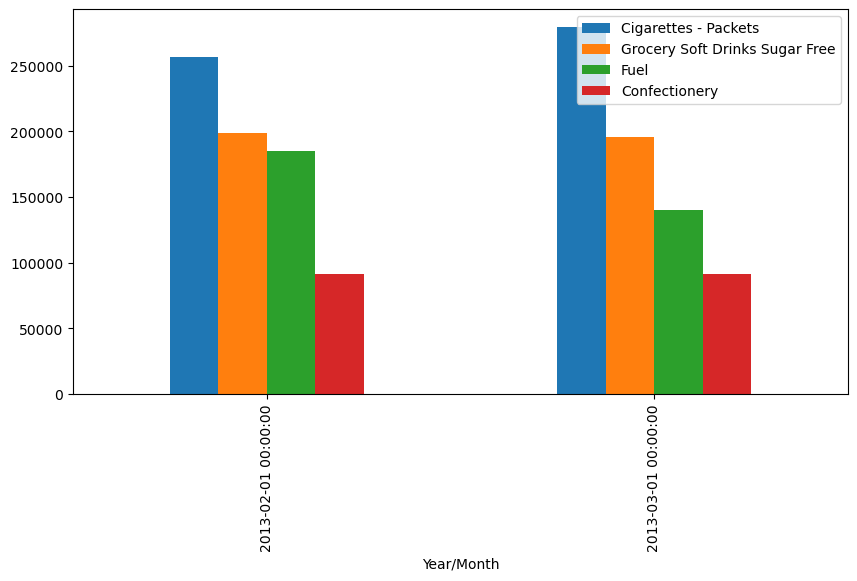

In [646]:
# plot first 5 columns
df.groupby('Year/Month').sum().loc['2013-02':'2013-03'][df.columns[1:5]].plot(kind='bar', figsize=(10, 5))

In [647]:
df_2013_02 = df.groupby('Year/Month').sum().loc['2013-02'][df.columns[1:6]]
df_2013_03 = df.groupby('Year/Month').sum().loc['2013-03'][df.columns[1:6]]
df_diff = df_2013_03.sum() - df_2013_02.sum()
df_diff

Cigarettes - Packets              22499
Grocery Soft Drinks Sugar Free    -2996
Fuel                             -45507
Confectionery                       278
Vegetables - Fresh                19128
dtype: int64

In [648]:
df_diff.values

array([ 22499,  -2996, -45507,    278,  19128], dtype=int64)

In [649]:
df_total_2013_02 = df.groupby('Year/Month').sum().loc['2013-02'][df.columns[1:6]].sum().sum()
df_total_2013_03 = df.groupby('Year/Month').sum().loc['2013-03'][df.columns[1:6]].sum().sum()

df_total_2013_02, df_total_2013_03

(823555, 816957)

In [650]:
indexes = ['2013-02'] + df.columns[1:6].to_list() +['2013-03']
indexes

['2013-02',
 'Cigarettes - Packets ',
 'Grocery Soft Drinks Sugar Free',
 'Fuel',
 'Confectionery',
 'Vegetables - Fresh',
 '2013-03']

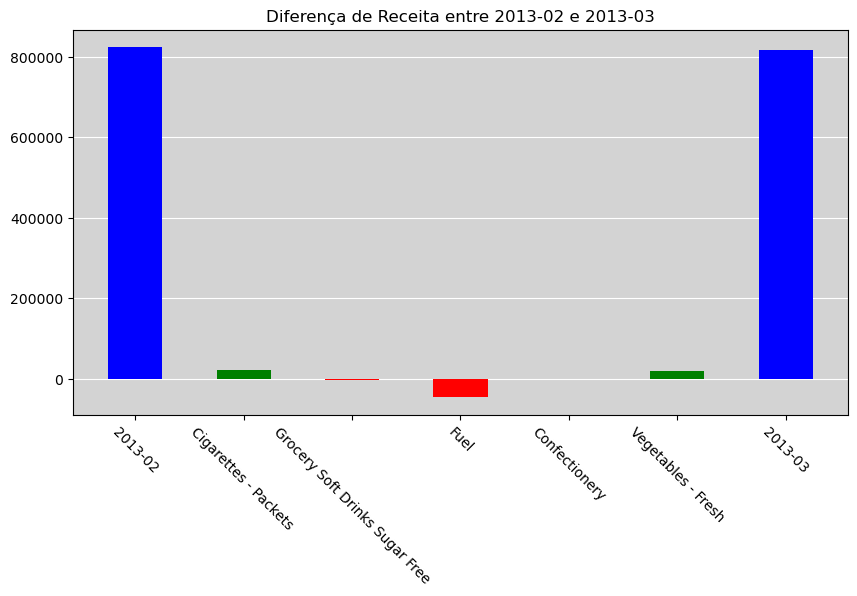

In [651]:
import matplotlib.pyplot as plt

df_totals_diff =pd.concat([pd.Series(df_total_2013_02), pd.Series(df_diff.values), pd.Series(df_total_2013_03)])

# redefinindo indexes para a refletir a concatenação
df_totals_diff.index = indexes

# colorindo de vermelho os valores negativos e verde os positivos com a primeira e ultima barra azul
colors=['red' if x < 0 else 'green' for x in df_totals_diff.values]
colors[0] = 'blue'
colors[-1] = 'blue'


plt.figure(figsize=(10, 5))
plt.bar(df_totals_diff.index, df_totals_diff.values, color=colors, width=0.5)

# rótulos de x inclinados sentido contrario
plt.xticks(rotation=-45)

# bakcground cinza
plt.gca().set_facecolor('lightgray')

# linhas do grid horizontais brancas em background
plt.grid(axis='y', color='white')

# barras em cima do grid
plt.gca().set_axisbelow(True)

# título
plt.title('Diferença de Receita entre 2013-02 e 2013-03')

plt.show()


In [652]:
df_totals_diff = pd.DataFrame(df_totals_diff, columns=['Total'])
df_totals_diff

,Total
2013-02,823555
Cigarettes - Packets,22499
Grocery Soft Drinks Sugar Free,-2996
Fuel,-45507
Confectionery,278
Vegetables - Fresh,19128
2013-03,816957


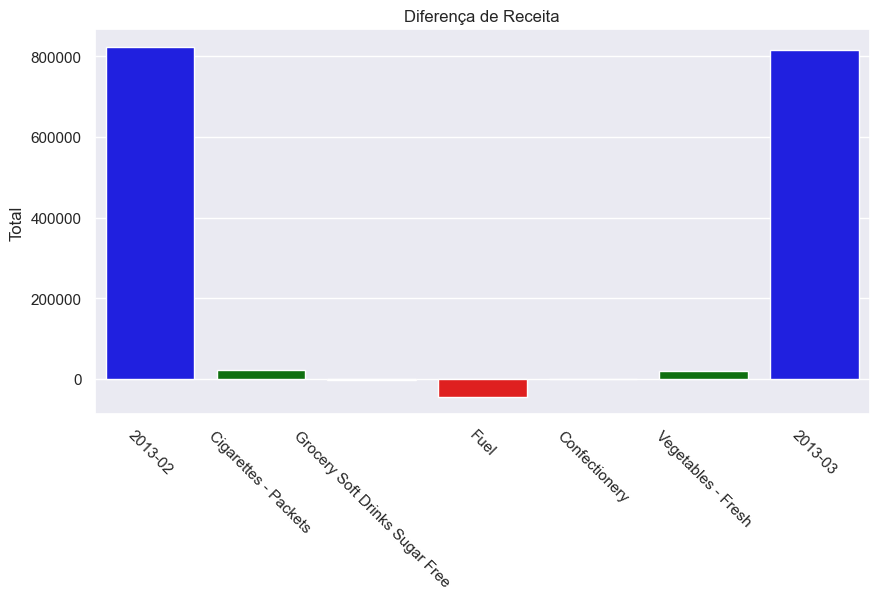

In [675]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(10, 5)})
plt.xticks(rotation=-45)
plt.title('Diferença de Receita')
sns.barplot(x=df_totals_diff.index, y=df_totals_diff.Total, data=df_totals_diff, palette=colors);
